In [ ]:
#FOLLOWING THIS HERE #https://nbviewer.jupyter.org/github/chambliss/Notebooks/blob/master/Word2Vec_News_Analysis.ipynb

In [ ]:
# please follw this  1 -https://nbviewer.jupyter.org/github/chambliss/Notebooks/blob/master/Word2Vec_News_Analysis.ipynb

In [ ]:
#please follow this for topic modeling # https://github.com/bhargavvader/personal/blob/master/notebooks/text_analysis_tutorial/text_analysis_tutorial.ipynb

In [ ]:
# pls follow this for topic modeling https://github.com/bhargavvader/personal/blob/master/notebooks/text_analysis_tutorial/topic_modelling.ipynb

In [590]:
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from gensim.models import Word2Vec, KeyedVectors

In [3]:
columns=["tweet","retweet","sentimant","agg1","agg2"]

In [4]:
data= pd.read_csv("Collect_two.csv" )

In [5]:
data.columns=columns

In [6]:
data.head(10)

tweet  retweet  sentimant  \
0  RT @trevor_norris0: Trump really be answering ...        1      -0.15   
1  RT @YourAnonCentral: Trump declares himself th...        1      -0.30   
2                   Biden factually states Trump is…        2       0.00   
3  @robreiner Except about knowing more about win...        2       0.50   
4                    Remember this Joe Biden .......        2       0.00   
5     RT @marklevinshow: CNN, unfair and unbalanced.        2      -0.50   
6                    They can all Toobin themselves.        2       0.00   
7                            https://t.co/W5WHoRu5m4        2       0.00   
8  RT @MZHemingway: Welker asks Biden about his s...        2       0.00   
9  Biden says "nothing was unethical" about his s...        2       0.00   

         agg1         agg2  
0  386.499068  1297.008067  
1  386.199068  1297.008067  
2  385.899068  1297.008067  
3  385.899068  1297.508067  
4  385.899068  1297.508067  
5  385.899068  1297.008067  
6  385.899068  1296.508067  
7  385.899068  1296.008067  
8  385.899068  1296.008067  
9  385.899068  1296.008067

In [7]:
rawtext= data["tweet"]

In [8]:
# ALL THE TEXT

In [9]:
rawtext= " ".join(rawtext)

In [10]:
rawtext

'RT @trevor_norris0: Trump really be answering all these questions about things that are wrong with America like he isn’t the president 😂 RT @YourAnonCentral: Trump declares himself the \'least\' racist person in the room, confirming he is racist. Biden factually states Trump is… @robreiner Except about knowing more about wind then Biden😎 Remember this Joe Biden ....... RT @marklevinshow: CNN, unfair and unbalanced. They can all Toobin themselves. https://t.co/W5WHoRu5m4 RT @MZHemingway: Welker asks Biden about his son\'s business dealings. Biden says "nothing was unethical" about his son\'s dealings. Biden cl… RT @JackPosobiec: Trump backstage pointed out that Welker protected Joe from most of the laptop questions, then added "But she\'s no Wallace" so we all agree that trump is delusional right? ?🤣🙄\n\n#Debate2020 RT @TeamTrump: President @realDonaldTrump: $6,500 will be taken away from American families under Joe Biden’s plan\n\n#Debates2020 https://t.… RT @dbongino: FYI America. Jo

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
tokens = word_tokenize(rawtext)

In [13]:
tokens

['RT',
 '@',
 'trevor_norris0',
 ':',
 'Trump',
 'really',
 'be',
 'answering',
 'all',
 'these',
 'questions',
 'about',
 'things',
 'that',
 'are',
 'wrong',
 'with',
 'America',
 'like',
 'he',
 'isn',
 '’',
 't',
 'the',
 'president',
 '😂',
 'RT',
 '@',
 'YourAnonCentral',
 ':',
 'Trump',
 'declares',
 'himself',
 'the',
 "'least",
 "'",
 'racist',
 'person',
 'in',
 'the',
 'room',
 ',',
 'confirming',
 'he',
 'is',
 'racist',
 '.',
 'Biden',
 'factually',
 'states',
 'Trump',
 'is…',
 '@',
 'robreiner',
 'Except',
 'about',
 'knowing',
 'more',
 'about',
 'wind',
 'then',
 'Biden😎',
 'Remember',
 'this',
 'Joe',
 'Biden',
 '.......',
 'RT',
 '@',
 'marklevinshow',
 ':',
 'CNN',
 ',',
 'unfair',
 'and',
 'unbalanced',
 '.',
 'They',
 'can',
 'all',
 'Toobin',
 'themselves',
 '.',
 'https',
 ':',
 '//t.co/W5WHoRu5m4',
 'RT',
 '@',
 'MZHemingway',
 ':',
 'Welker',
 'asks',
 'Biden',
 'about',
 'his',
 'son',
 "'s",
 'business',
 'dealings',
 '.',
 'Biden',
 'says',
 '``',
 'nothing'

In [14]:
#remove non word characters

In [15]:
"@#$123".isalpha()

False

In [16]:
[word for word in tokens if not word.isalpha()]

['@',
 'trevor_norris0',
 ':',
 '’',
 '😂',
 '@',
 ':',
 "'least",
 "'",
 ',',
 '.',
 'is…',
 '@',
 'Biden😎',
 '.......',
 '@',
 ':',
 ',',
 '.',
 '.',
 ':',
 '//t.co/W5WHoRu5m4',
 '@',
 ':',
 "'s",
 '.',
 '``',
 "''",
 "'s",
 '.',
 'cl…',
 '@',
 ':',
 ',',
 '``',
 "'s",
 "''",
 '?',
 '?',
 '🤣🙄',
 '#',
 'Debate2020',
 '@',
 ':',
 '@',
 ':',
 '$',
 '6,500',
 '’',
 '#',
 'Debates2020',
 ':',
 '//t.…',
 '@',
 ':',
 '.',
 '.',
 ':',
 '//t.co/KOydyO4UHY',
 '@',
 'PetalsF0rArmor',
 ':',
 '“',
 '’',
 '”',
 '*',
 '*',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '@',
 ':',
 ',',
 'his…',
 '@',
 ':',
 '.',
 'Bide…',
 '@',
 ':',
 'U.S.',
 "'ve",
 'children…',
 '@',
 ':',
 '’',
 '.',
 '@',
 ':',
 '.',
 '.',
 '@',
 ':',
 ',',
 ',',
 '“',
 '”',
 ':',
 '//t.co/A73ZeAI0PR',
 ',',
 '“',
 'you…',
 '#',
 '@',
 ':',
 '...',
 '’',
 '.',
 '’',
 '.',
 'A…',
 ':',
 '//t.co/beIldtgDB1',
 '@',
 '@',
 '@',
 '.',
 '?',
 '@',
 ':',
 ':',
 ':',
 '//t.co/lGDbRuP6tZ',
 '@',
 ':',
 ':',
 '‘',
 '’',
 '.',
 ',',
 ',',
 ',

In [17]:
#remove numbers etc and also LOWER

In [18]:
tokens1=[word.lower() for word in tokens if word.isalpha()]

In [19]:
tokens1

['rt',
 'trump',
 'really',
 'be',
 'answering',
 'all',
 'these',
 'questions',
 'about',
 'things',
 'that',
 'are',
 'wrong',
 'with',
 'america',
 'like',
 'he',
 'isn',
 't',
 'the',
 'president',
 'rt',
 'youranoncentral',
 'trump',
 'declares',
 'himself',
 'the',
 'racist',
 'person',
 'in',
 'the',
 'room',
 'confirming',
 'he',
 'is',
 'racist',
 'biden',
 'factually',
 'states',
 'trump',
 'robreiner',
 'except',
 'about',
 'knowing',
 'more',
 'about',
 'wind',
 'then',
 'remember',
 'this',
 'joe',
 'biden',
 'rt',
 'marklevinshow',
 'cnn',
 'unfair',
 'and',
 'unbalanced',
 'they',
 'can',
 'all',
 'toobin',
 'themselves',
 'https',
 'rt',
 'mzhemingway',
 'welker',
 'asks',
 'biden',
 'about',
 'his',
 'son',
 'business',
 'dealings',
 'biden',
 'says',
 'nothing',
 'was',
 'unethical',
 'about',
 'his',
 'son',
 'dealings',
 'biden',
 'rt',
 'jackposobiec',
 'trump',
 'backstage',
 'pointed',
 'out',
 'that',
 'welker',
 'protected',
 'joe',
 'from',
 'most',
 'of',
 't

In [20]:
# Filter out stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [21]:
token2=[word for word in tokens1 if not word in stop_words] 
token2

['rt',
 'trump',
 'really',
 'answering',
 'questions',
 'things',
 'wrong',
 'america',
 'like',
 'president',
 'rt',
 'youranoncentral',
 'trump',
 'declares',
 'racist',
 'person',
 'room',
 'confirming',
 'racist',
 'biden',
 'factually',
 'states',
 'trump',
 'robreiner',
 'except',
 'knowing',
 'wind',
 'remember',
 'joe',
 'biden',
 'rt',
 'marklevinshow',
 'cnn',
 'unfair',
 'unbalanced',
 'toobin',
 'https',
 'rt',
 'mzhemingway',
 'welker',
 'asks',
 'biden',
 'son',
 'business',
 'dealings',
 'biden',
 'says',
 'nothing',
 'unethical',
 'son',
 'dealings',
 'biden',
 'rt',
 'jackposobiec',
 'trump',
 'backstage',
 'pointed',
 'welker',
 'protected',
 'joe',
 'laptop',
 'questions',
 'added',
 'wallace',
 'agree',
 'trump',
 'delusional',
 'right',
 'rt',
 'teamtrump',
 'president',
 'realdonaldtrump',
 'taken',
 'away',
 'american',
 'families',
 'joe',
 'biden',
 'plan',
 'https',
 'rt',
 'dbongino',
 'fyi',
 'america',
 'joe',
 'biden',
 'full',
 'shit',
 'https',
 'rt',
 

In [22]:
#custumn stopwords in the dataset

In [23]:
my_own_remove_word=["rt","https",'de','él']

In [24]:
token2=[word for word in tokens1 if not word in my_own_remove_word] 

In [25]:
token2

['trump',
 'really',
 'be',
 'answering',
 'all',
 'these',
 'questions',
 'about',
 'things',
 'that',
 'are',
 'wrong',
 'with',
 'america',
 'like',
 'he',
 'isn',
 't',
 'the',
 'president',
 'youranoncentral',
 'trump',
 'declares',
 'himself',
 'the',
 'racist',
 'person',
 'in',
 'the',
 'room',
 'confirming',
 'he',
 'is',
 'racist',
 'biden',
 'factually',
 'states',
 'trump',
 'robreiner',
 'except',
 'about',
 'knowing',
 'more',
 'about',
 'wind',
 'then',
 'remember',
 'this',
 'joe',
 'biden',
 'marklevinshow',
 'cnn',
 'unfair',
 'and',
 'unbalanced',
 'they',
 'can',
 'all',
 'toobin',
 'themselves',
 'mzhemingway',
 'welker',
 'asks',
 'biden',
 'about',
 'his',
 'son',
 'business',
 'dealings',
 'biden',
 'says',
 'nothing',
 'was',
 'unethical',
 'about',
 'his',
 'son',
 'dealings',
 'biden',
 'jackposobiec',
 'trump',
 'backstage',
 'pointed',
 'out',
 'that',
 'welker',
 'protected',
 'joe',
 'from',
 'most',
 'of',
 'the',
 'laptop',
 'questions',
 'then',
 'adde

# create vectors and corresponding word list

In [26]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary = True) 

In [27]:
model.vector_size

300

In [28]:
model["apple"].shape

(300,)

In [29]:
model["apple"]

array([-0.06445312, -0.16015625, -0.01208496,  0.13476562, -0.22949219,
        0.16210938,  0.3046875 , -0.1796875 , -0.12109375,  0.25390625,
       -0.01428223, -0.06396484, -0.08056641, -0.05688477, -0.19628906,
        0.2890625 , -0.05151367,  0.14257812, -0.10498047, -0.04736328,
       -0.34765625,  0.35742188,  0.265625  ,  0.00188446, -0.01586914,
        0.00195312, -0.35546875,  0.22167969,  0.05761719,  0.15917969,
        0.08691406, -0.0267334 , -0.04785156,  0.23925781, -0.05981445,
        0.0378418 ,  0.17382812, -0.41796875,  0.2890625 ,  0.32617188,
        0.02429199, -0.01647949, -0.06494141, -0.08886719,  0.07666016,
       -0.15136719,  0.05249023, -0.04199219, -0.05419922,  0.00108337,
       -0.20117188,  0.12304688,  0.09228516,  0.10449219, -0.00408936,
       -0.04199219,  0.01409912, -0.02111816, -0.13476562, -0.24316406,
        0.16015625, -0.06689453, -0.08984375, -0.07177734, -0.00595093,
       -0.00482178, -0.00089264, -0.30664062, -0.0625    ,  0.07

#CREATE DATAFRAME

In [30]:
len(token2)

144220

In [31]:
len(model.key_to_index)  # this is the model dictionary

3000000

In [32]:
vectors = [model[word] for word in token2 if word in model.key_to_index]

In [33]:
word_list =[word for word in token2 if word in model.key_to_index]

In [34]:
len(vectors), len(word_list) ,word_list[2],token2[2],vectors[2],

(124920,
 124920,
 'be',
 'be',
 array([-2.28515625e-01, -8.83789062e-02,  1.27929688e-01,  1.50390625e-01,
        -7.32421875e-02,  8.64257812e-02,  6.39648438e-02,  9.66796875e-02,
         5.83496094e-02,  1.43554688e-01, -2.92968750e-02, -1.86523438e-01,
         1.19628906e-02,  4.95605469e-02,  7.32421875e-02,  1.26953125e-01,
         4.32128906e-02,  1.24023438e-01, -3.36914062e-02,  5.37109375e-03,
         2.23388672e-02, -6.05468750e-02,  1.94335938e-01, -3.81469727e-03,
         1.33789062e-01, -4.05883789e-03, -2.05078125e-01, -5.78613281e-02,
         1.29882812e-01,  1.73339844e-02, -9.61914062e-02, -1.31835938e-02,
        -2.10937500e-01,  1.55273438e-01,  2.89062500e-01, -7.27539062e-02,
         5.37109375e-02, -2.31933594e-02,  9.61914062e-02,  4.79125977e-03,
         2.42187500e-01,  1.41601562e-01,  8.05664062e-02, -6.78710938e-02,
        -4.61425781e-02, -9.13085938e-02,  5.63964844e-02,  1.89453125e-01,
         1.53350830e-03,  9.17968750e-02,  1.08886719e-0

In [43]:
df = pd.concat((pd.Series(vectors),pd.Series(word_list)),axis=1,ignore_index=True ,keys=["vectors","words"]).set_index(pd.Series(word_list))
df.columns=["vectors","words"]

In [44]:
df=df.drop(["words"], axis=1)

In [63]:
#TSNE will not take this but below format EACH needs to be a column

In [45]:
df

vectors
trump      [-0.07910156, 0.12158203, -0.008422852, 0.3066...
really     [0.096191406, -0.028686523, -0.10839844, 0.145...
be         [-0.22851562, -0.088378906, 0.12792969, 0.1503...
answering  [0.10498047, 0.083984375, 0.006713867, -0.1000...
all        [-0.0078125, -0.027954102, 0.040527344, 0.1176...
...                                                      ...
stranded   [0.22949219, 0.21289062, -0.20703125, -0.06225...
without    [0.23730469, -0.10107422, -0.072753906, 0.0825...
parents    [-0.019042969, -0.23925781, 0.037109375, 0.145...
trump      [-0.07910156, 0.12158203, -0.008422852, 0.3066...
good       [0.040527344, 0.0625, -0.017456055, 0.07861328...

[124920 rows x 1 columns]

In [37]:
#df.info()

In [ ]:
# we can make it with a dictionary

In [117]:
# Zip the words together with their vector representations
word_vec_zip = zip(word_list, vectors)

In [118]:
word_vec_zip

In [119]:
# Cast to a dict so we can turn it into a dataframe
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.shape

(6841, 300)

In [120]:
df

0         1         2         3         4         5    \
trump      -0.079102  0.121582 -0.008423  0.306641 -0.154297  0.107422   
really      0.096191 -0.028687 -0.108398  0.145508 -0.091797  0.041504   
be         -0.228516 -0.088379  0.127930  0.150391 -0.073242  0.086426   
answering   0.104980  0.083984  0.006714 -0.100098 -0.113281  0.088867   
all        -0.007812 -0.027954  0.040527  0.117676 -0.013306 -0.090820   
...              ...       ...       ...       ...       ...       ...   
antiviral  -0.194336 -0.006592 -0.044434  0.253906  0.156250  0.006989   
gusto       0.281250  0.158203  0.038330 -0.001198  0.012024 -0.185547   
empresario -0.025757 -0.013672  0.026733  0.014221  0.058105  0.152344   
eres       -0.104980  0.082520  0.194336  0.130859  0.046387  0.107910   
político   -0.070801  0.007324  0.140625  0.054443 -0.047852 -0.007111   

                 6         7         8         9    ...       290       291  \
trump       0.083984 -0.026733 -0.018311  0.148438  ...  0.458984 -0.106445   
really      0.036865 -0.155273  0.012268  0.032471  ... -0.122559  0.108398   
be          0.063965  0.096680  0.058350  0.143555  ... -0.109863  0.064941   
answering  -0.162109 -0.080078  0.144531  0.153320  ... -0.093750  0.071289   
all         0.023682 -0.024048  0.138672  0.079590  ... -0.079590  0.043945   
...              ...       ...       ...       ...  ...       ...       ...   
antiviral  -0.250000 -0.197266  0.232422  0.140625  ...  0.105957 -0.150391   
gusto       0.109375  0.194336  0.066406  0.171875  ...  0.041504 -0.375000   
empresario -0.151367  0.014832 -0.124512 -0.090820  ...  0.054443  0.058350   
eres       -0.009827 -0.125977 -0.073730  0.041016  ... -0.069824  0.059570   
político   -0.022339 -0.078613  0.022827  0.011841  ... -0.004211  0.010437   

                 292       293       294       295       296       297  \
trump      -0.092773  0.106934  0.060059 -0.285156  0.131836 -0.392578   
really     -0.193359  0.077637 -0.235352 -0.039795  0.175781  0.069336   
be          0.117188  0.045410  0.214844  0.042969 -0.139648 -0.212891   
answering  -0.110840 -0.215820  0.051514  0.099121  0.007507 -0.145508   
all        -0.043457 -0.085449 -0.106934  0.044434  0.123047  0.039551   
...              ...       ...       ...       ...       ...       ...   
antiviral   0.200195  0.139648  0.281250  0.240234 -0.322266  0.106445   
gusto      -0.048828 -0.318359 -0.095215 -0.050293  0.142578 -0.020020   
empresario -0.208984  0.148438  0.092773 -0.010681  0.017456 -0.030273   
eres       -0.126953 -0.098145 -0.029175  0.029663 -0.071289 -0.162109   
político   -0.011414  0.136719  0.015198 -0.007080 -0.034424 -0.064453   

                 298       299  
trump       0.077637  0.271484  
really      0.104492 -0.164062  
be          0.188477 -0.145508  
answering  -0.134766  0.156250  
all        -0.060547  0.008057  
...              ...       ...  
antiviral   0.306641  0.246094  
gusto      -0.320312  0.044678  
empresario  0.017578  0.091309  
eres       -0.006989  0.092285  
político    0.113281  0.207031  

[6841 rows x 300 columns]

# TSNE START HERE

Dimensionality Reduction: t-SNE
Next, we're going to squish (read: do dimensionality reduction on) these word vectors using t-SNE. If you're not familiar with t-SNE and its interpretations, check out this excellent, interactive distill.pub article on t-SNE.

It's important to play around with the parameters for t-SNE, as different values can produce very different results. I tested several values between 0 and 100 for perplexity, and found that it produced roughly the same shape each time. I tested several learning rates between 20 and 400 as well, and decided to leave the learning rate at its default (200).

https://distill.pub/2016/misread-tsne/

In [47]:
#***** we need to find the main 500 words

<h1> TSNE 2 D</h1

In [67]:
#CREATING 2 D VECTORS

In [108]:
df.shape

(6841, 300)

In [327]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'pca', random_state = 20, perplexity = 80)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:500])

In [69]:
tsne_df

array([[-7.72332907e-01, -6.53571904e-01],
       [-3.79234642e-01, -1.83079886e+00],
       [ 6.23755455e-01, -1.20424986e+00],
       [-2.66427493e+00, -1.74851811e+00],
       [ 2.20020920e-01, -8.45523298e-01],
       [ 4.05157469e-02, -9.14968252e-01],
       [-2.74067211e+00, -1.76782382e+00],
       [ 2.72989154e-01, -1.01384807e+00],
       [-3.80007803e-01, -1.78318000e+00],
       [ 2.80052483e-01, -7.72919953e-01],
       [ 1.00204575e+00, -1.63213408e+00],
       [-7.75990248e-01, -1.82553387e+00],
       [ 6.64374292e-01, -6.38996899e-01],
       [-2.48949575e+00, -4.04832029e+00],
       [-8.24864283e-02, -1.48905945e+00],
       [-1.88526481e-01, -9.66527820e-01],
       [ 4.25519139e-01, -4.53034019e+00],
       [-8.40888023e-01, -4.00373936e+00],
       [ 5.51895976e-01, -6.35511041e-01],
       [ 3.18410301e+00, -2.09323239e+00],
       [ 1.44761384e+00, -3.59153819e+00],
       [-1.43347538e+00, -7.60182440e-01],
       [-2.25168681e+00,  1.73853302e+00],
       [-1.

In [71]:
#PLOT IT WITH MATPLOTLLIB 2D

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



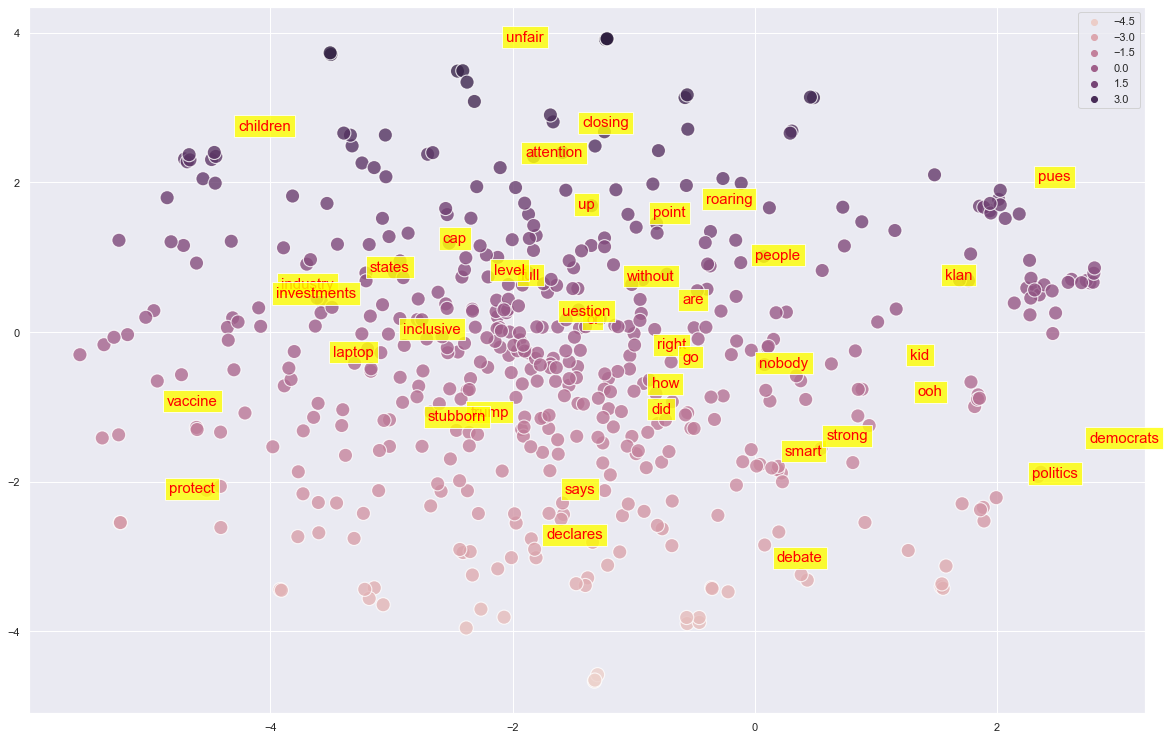

In [328]:
sns.set()
fig, ax = plt.subplots(figsize = (20, 13))

#hue is classes can he anything s is size of the points  markers is if the text has a label

sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], hue=tsne_df[:, 1], alpha = 0.8, s=200, markers=True )

#the text comes from here df.index[i]
# TEXT STYLING fontdict=dict(color="red",size=15),bbox=dict(facecolor="yellow",alpha=0.5)
#THE +0.4 ... is the offset of label


#how many STEPS for i in range 1, 400 and the lAST NO is the THE STEPS SO YOU DONT SHOW all the 

for i in range(0,400,10):
    plt.text(tsne_df[i, 0]+0.4, tsne_df[i, 1]+0.4, df.index[i], fontdict=dict(color="red",size=15),
         bbox=dict(facecolor="yellow",alpha=0.8))
    
plt.show()

In [ ]:
#TSNE WITH PARAMETER PCA AND perplexity 30 default

In [324]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne_pca = TSNE(n_components = 2, init = 'pca', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df_p = tsne_pca.fit_transform(df[:500])

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



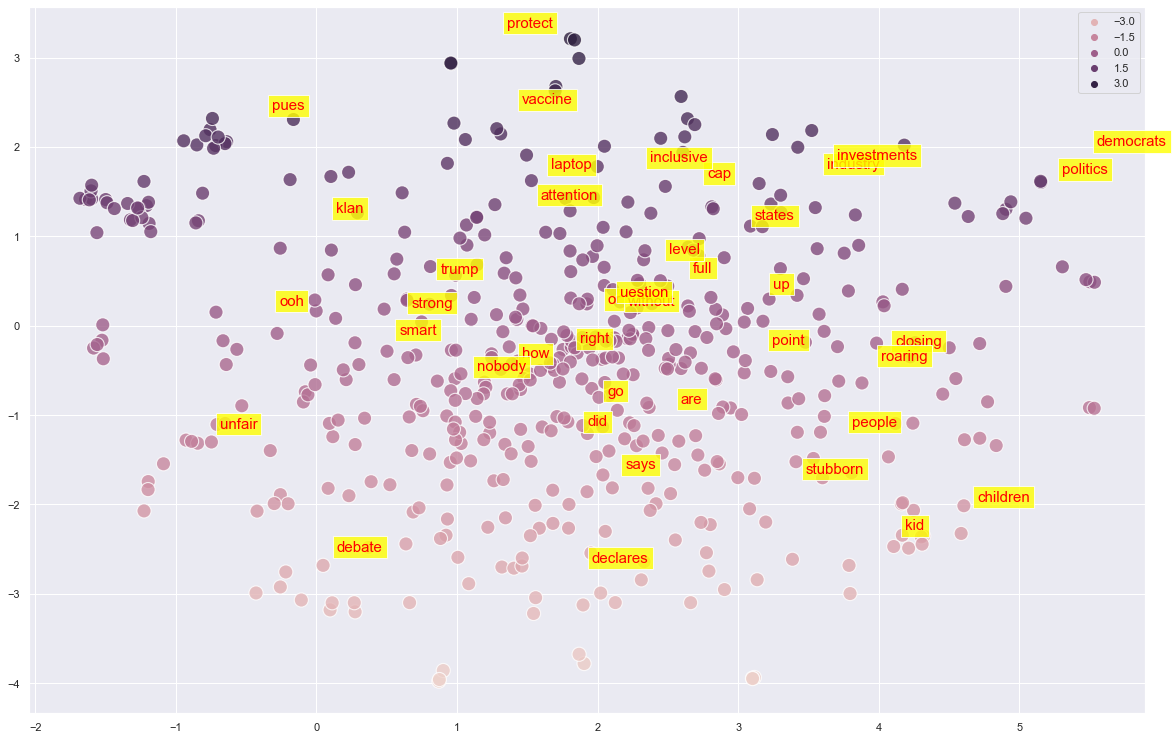

In [329]:
sns.set()
fig, ax = plt.subplots(figsize = (20, 13))

#hue is classes can he anything s is size of the points  markers is if the text has a label

sns.scatterplot(tsne_df_p[:, 0], tsne_df_p[:, 1], hue=tsne_df_p[:, 1], alpha = 0.8, s=200, markers=True )

#the text comes from here df.index[i]
# TEXT STYLING fontdict=dict(color="red",size=15),bbox=dict(facecolor="yellow",alpha=0.5)
#THE +0.4 ... is the offset of label


#how many STEPS for i in range 1, 400 and the lAST NO is the THE STEPS SO YOU DONT SHOW all the 

for i in range(0,400,10):
    plt.text(tsne_df_p[i, 0]+0.4, tsne_df_p[i, 1]+0.4, df.index[i], fontdict=dict(color="red",size=15),
         bbox=dict(facecolor="yellow",alpha=0.8))
    
plt.show()

In [77]:
#another example

/Users/user/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



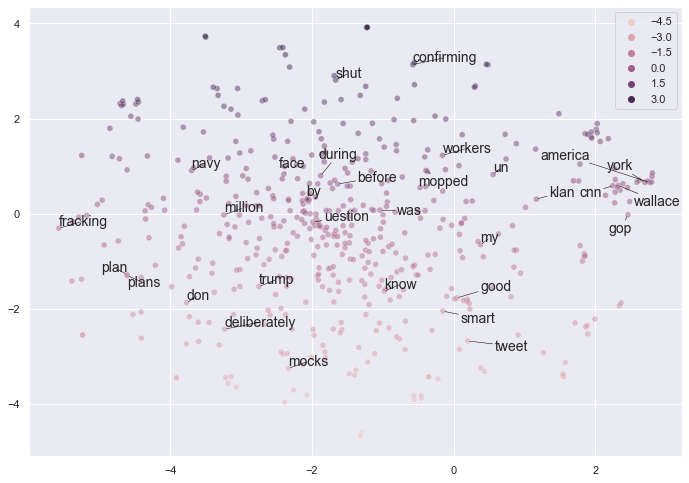

In [330]:
sns.set()

fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1],hue=tsne_df[:, 1], alpha = 0.5)

# Second plot: Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 13))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()


# TSNE 3 D

In [81]:
#make 3 dimensions TSNE reduction mashup

In [146]:
?TSNE

In [151]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne3 = TSNE(n_components = 3, init = 'pca', random_state = 10, perplexity = 75)

# Use only 400 rows to shorten processing time
tsne_df3 = tsne3.fit_transform(df[:500])

In [134]:
tsne_df3[1]

array([  2.6725085 , -80.438065  ,  -0.34825024], dtype=float32)

In [135]:
tsne_df3[1].shape

(3,)

In [136]:
tsne_df3.shape

(500, 3)

In [137]:
df.shape

(6841, 300)

In [138]:
len(df[:500].index)

500

In [155]:
#WHY IT LOOK LIKE A BALL?

# why a ball
beacuse the dataset itself is from one twitter topic and hence in larget Word2Vec its closely positioned

In [156]:
#if you see closely  FEELINGS ADJECTIVES , BUINESS AND POLITICS ARE Seperated

In [168]:
df[:5]

0         1         2         3         4         5    \
trump     -0.079102  0.121582 -0.008423  0.306641 -0.154297  0.107422   
really     0.096191 -0.028687 -0.108398  0.145508 -0.091797  0.041504   
be        -0.228516 -0.088379  0.127930  0.150391 -0.073242  0.086426   
answering  0.104980  0.083984  0.006714 -0.100098 -0.113281  0.088867   
all       -0.007812 -0.027954  0.040527  0.117676 -0.013306 -0.090820   

                6         7         8         9    ...       290       291  \
trump      0.083984 -0.026733 -0.018311  0.148438  ...  0.458984 -0.106445   
really     0.036865 -0.155273  0.012268  0.032471  ... -0.122559  0.108398   
be         0.063965  0.096680  0.058350  0.143555  ... -0.109863  0.064941   
answering -0.162109 -0.080078  0.144531  0.153320  ... -0.093750  0.071289   
all        0.023682 -0.024048  0.138672  0.079590  ... -0.079590  0.043945   

                292       293       294       295       296       297  \
trump     -0.092773  0.106934  0.060059 -0.285156  0.131836 -0.392578   
really    -0.193359  0.077637 -0.235352 -0.039795  0.175781  0.069336   
be         0.117188  0.045410  0.214844  0.042969 -0.139648 -0.212891   
answering -0.110840 -0.215820  0.051514  0.099121  0.007507 -0.145508   
all       -0.043457 -0.085449 -0.106934  0.044434  0.123047  0.039551   

                298       299  
trump      0.077637  0.271484  
really     0.104492 -0.164062  
be         0.188477 -0.145508  
answering -0.134766  0.156250  
all       -0.060547  0.008057  

[5 rows x 300 columns]

In [169]:
df[4:5]

0         1         2         3         4        5         6    \
all -0.007812 -0.027954  0.040527  0.117676 -0.013306 -0.09082  0.023682   

          7         8        9    ...      290       291       292       293  \
all -0.024048  0.138672  0.07959  ... -0.07959  0.043945 -0.043457 -0.085449   

          294       295       296       297       298       299  
all -0.106934  0.044434  0.123047  0.039551 -0.060547  0.008057  

[1 rows x 300 columns]

In [172]:
df[5:6].index[0]

'these'

In [174]:
i=3

In [175]:
df[i-1:i].index[0]

'be'

In [186]:
tsne_df3[5]

[array([ 87.611946,  64.96902 , -64.87043 ], dtype=float32)]

In [203]:
s=pd.DataFrame(tsne_df3)
s

0           1           2
0   -153.054138   34.178993   39.684025
1      2.635489  -86.168655   18.352903
2      0.873103  -19.270805   27.120626
3     85.001808  -92.490913  -28.045958
4    -42.687981 -223.311646  -73.076019
..          ...         ...         ...
495   -5.585148   76.125298  141.223831
496    1.642467   79.044586  -20.038109
497   41.442963  101.079147   86.627586
498  -29.457121   41.369900   47.222633
499   96.921173  -26.954397  -13.055568

[500 rows x 3 columns]

In [205]:
s[2][2]

27.120626

In [192]:
?px.scatter_3d

In [176]:
tsne_df3.shape

(500, 3)

In [322]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne3 = TSNE(n_components = 3, init = 'pca', random_state = 30, perplexity = 200)

# Use only 400 rows to shorten processing time
tsne_df3 = tsne3.fit_transform(df[:500])

In [323]:
import plotly.express as px

fig = px.scatter_3d(tsne_df3 , x=tsne_df3[:,0], y=tsne_df3[:,1], z=tsne_df3[:,2],
              color=tsne_df3[:,2], text=df[:500].index)
fig.show()

# Lets try another corpus

In [209]:
#has multiple topics inside this

In [208]:
m_topic =["Bread is a staple food prepared from a dough of flour and water, usually by baking. \
Throughout recorded history, it has been a prominent food in large parts of the world. \
It is one of the oldest human-made foods, having been of significant importance since the dawn of \
agriculture, and plays an essential role in both religious rituals and secular culture.\
Bread may be leavened by naturally occurring microbes, chemicals, industrially produced yeast, \
or high-pressure aeration. In many countries, commercial bread often contains additives to improve flavor,\
texture, color, shelf life, nutrition, and ease of production The integration of a whole CPU onto a single or a \
few integrated circuits using Very-Large-Scale Integration (VLSI) greatly reduced the cost of processing power.\
Integrated circuit processors are produced in large numbers by highly automated metal-oxide-semiconductor (MOS)\
fabrication processes, resulting in a relatively low unit price. Single-chip processors\
increase reliability because there are many fewer electrical connections that could fail.\
As microprocessor designs improve, the cost of manufacturing a chip\
(with smaller components built on a semiconductor chip the same size)\
generally stays the same according to Rock's law.Making America Great Again has always been about defending the\
rule of law, supporting the men and women of law enforcement and upholding our nation’s most sacred\
traditions and values. Mob violence goes against everything I believe in and everything our movement stands for.\
No true supporter of mine could ever endorse political violence. No true supporter of mine could ever disrespect\
law enforcement or our great American flag. No true supporter of mine could ever threaten or harass their fellow\
Americans. If you do any of these things, you are not supporting our movement, you are attacking it and you are\
attacking our country. We can not tolerate it."]

In [212]:
      textm=[word.lower() for word in m_topic if word not in stop_words]

In [216]:
textm=[word.lower() for word in m_topic if not word.isalpha()]

In [226]:
textm=" ".join(textm)

In [227]:
textm

"bread is a staple food prepared from a dough of flour and water, usually by baking. throughout recorded history, it has been a prominent food in large parts of the world. it is one of the oldest human-made foods, having been of significant importance since the dawn of agriculture, and plays an essential role in both religious rituals and secular culture.bread may be leavened by naturally occurring microbes, chemicals, industrially produced yeast, or high-pressure aeration. in many countries, commercial bread often contains additives to improve flavor,texture, color, shelf life, nutrition, and ease of production the integration of a whole cpu onto a single or a few integrated circuits using very-large-scale integration (vlsi) greatly reduced the cost of processing power.integrated circuit processors are produced in large numbers by highly automated metal-oxide-semiconductor (mos)fabrication processes, resulting in a relatively low unit price. single-chip processorsincrease reliability 

In [229]:
m_word = [word for word in textm.split() if word in model.key_to_index]

In [231]:
m_vector = [model[word] for word in textm.split() if word in model.key_to_index]

In [232]:
m_zip = zip(m_word,m_vector)

In [233]:
m_dict= dict(m_zip)

In [235]:
m_df=pd.DataFrame.from_dict(m_dict, orient='index')

In [236]:
m_df

0         1         2         3         4         5    \
bread     0.111816  0.023560 -0.150391  0.243164  0.103027  0.165039   
is        0.007050 -0.073242  0.171875  0.022583 -0.132812  0.198242   
staple    0.129883  0.201172 -0.220703  0.384766 -0.238281  0.018433   
food     -0.181641  0.165039 -0.166016  0.357422 -0.092285  0.201172   
prepared -0.132812  0.138672  0.049561 -0.040283 -0.115723  0.027466   
...            ...       ...       ...       ...       ...       ...   
country.  0.012329  0.089844  0.086914  0.006714 -0.017578  0.067871   
we       -0.017944  0.117188  0.052734  0.255859 -0.084473 -0.128906   
can       0.097656 -0.035645  0.091797  0.151367 -0.199219  0.033447   
tolerate -0.255859 -0.002350 -0.033936  0.200195 -0.154297  0.148438   
it.       0.211914 -0.115723  0.027100  0.142578 -0.074707  0.086426   

               6         7         8         9    ...       290       291  \
bread     0.384766 -0.324219 -0.163086 -0.023804  ... -0.277344 -0.228516   
is        0.112793 -0.107910  0.071777  0.020874  ... -0.233398 -0.036377   
staple    0.032959 -0.133789  0.065918  0.240234  ... -0.180664 -0.306641   
food     -0.054688 -0.261719 -0.172852 -0.080566  ... -0.369141 -0.055176   
prepared  0.011292 -0.036865  0.173828 -0.078125  ... -0.296875 -0.330078   
...            ...       ...       ...       ...  ...       ...       ...   
country.  0.155273 -0.024780 -0.063477 -0.073730  ... -0.016235  0.046875   
we        0.042969 -0.050293 -0.204102  0.059570  ... -0.085938  0.102539   
can       0.199219 -0.061279 -0.013733 -0.020264  ... -0.173828  0.047119   
tolerate  0.443359 -0.105957  0.036865  0.058838  ... -0.076660  0.373047   
it.      -0.066895  0.036865 -0.073730 -0.125977  ...  0.149414  0.051270   

               292       293       294       295       296       297  \
bread    -0.234375  0.004181  0.228516 -0.064453 -0.037109  0.094727   
is       -0.093750  0.182617  0.027100  0.127930 -0.024780  0.011230   
staple    0.013977  0.083008  0.150391 -0.378906 -0.051758 -0.157227   
food     -0.149414  0.398438  0.092773  0.033936 -0.061523  0.159180   
prepared -0.298828  0.094727 -0.079590  0.000805 -0.105957  0.036865   
...            ...       ...       ...       ...       ...       ...   
country. -0.020630  0.010254 -0.154297  0.008362 -0.033936 -0.019897   
we       -0.128906 -0.000416  0.067383  0.045410  0.029297 -0.033203   
can      -0.058105  0.070801 -0.092773  0.236328  0.063477 -0.193359   
tolerate  0.296875  0.011597 -0.228516 -0.118164 -0.068848 -0.244141   
it.       0.161133  0.115234 -0.146484 -0.125977 -0.058838 -0.055664   

               298       299  
bread    -0.077148  0.008057  
is        0.164062  0.106934  
staple    0.156250  0.056396  
food      0.127930  0.002228  
prepared -0.035645 -0.215820  
...            ...       ...  
country.  0.012756  0.104492  
we        0.149414 -0.119141  
can      -0.117676  0.050781  
tolerate  0.129883  0.148438  
it.      -0.080078  0.369141  

[142 rows x 300 columns]

In [312]:
# Initialize t-SNE
tsne_m = TSNE(n_components = 2, init = 'random', random_state =15, perplexity =85)

# Use only 400 rows to shorten processing time
tsne_df_m = tsne_m.fit_transform(m_df)

In [306]:
#?TSNE

In [315]:
tsne_m._validate_data

<bound method BaseEstimator._validate_data of TSNE(perplexity=85, random_state=15)>

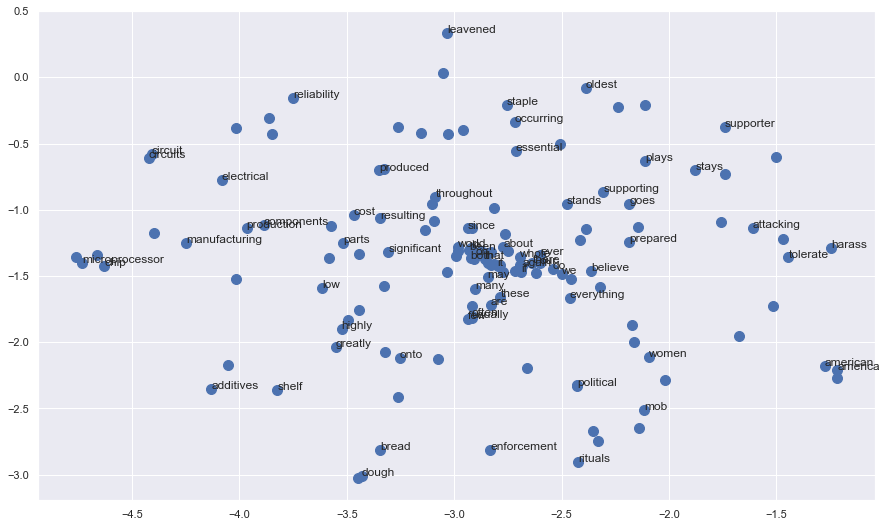

In [313]:
sns.set()
fig, ax = plt.subplots(figsize = (15, 9))
plt.scatter(tsne_df_m[:,1],tsne_df_m[:,0],s=100)
for i in range(0,142,2):
    plt.text(tsne_df_m[i,1],tsne_df_m[i,0],m_df.index[i])

# TSNE 3D with multiple topics

In [338]:
# Initialize t-SNE
tsne_3m = TSNE(n_components = 3, init = 'pca', random_state =10, perplexity =60)

# Use only 400 rows to shorten processing time
tsne_df_3m = tsne_3m.fit_transform(m_df)

In [339]:
fig = px.scatter_3d(tsne_df_3m , x=tsne_df_3m[:,0], y=tsne_df_3m[:,1], z=tsne_df_3m[:,2],
              color=tsne_df_3m[:,2], text=m_df.index)
fig.show()

In [341]:
#do 3d Measures matter in euclian dostance c2 = a2 + b2  what is 3rd dimension in word 2 Vec

# Lets do some topic modeling

In [342]:
import gensim
import numpy as np
import spacy
from spacy import displacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import sklearn

In [344]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
#from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary

In [346]:
nlp = spacy.load("en_core_web_sm")

#  1 using twitter dataset about trump

In [348]:
len(rawtext)

1032945

In [352]:
r_text=rawtext[:990000]

In [353]:
doc = nlp(r_text.lower())

In [355]:
dir(doc)

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_get_array_attrs',
 '_py_tokens',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set_ents',
 'se

In [373]:
#And this is the magic of spaCy - just like that, we've managed to get rid of stopwords, punctauation markers, and added the lemmatized word.
#Sometimes topic models make more sense when 'New' and 'York' are treated as 'New_York' - we can do this by creating a bigram model and modifying our corpus accordingly.

In [393]:
texts, article = [], []
for w in doc:
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and w.text != 'I'and w.text.isalpha():
        # we add the lematized version of the word
        article.append(w.lemma_)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        texts.append(article)
        article = []

In [394]:
len(texts)

537

In [395]:
texts

[['rt',
  'trump',
  'answer',
  'question',
  'thing',
  'wrong',
  'america',
  'like',
  'president',
  'rt',
  'trump',
  'declare',
  'racist',
  'person',
  'room',
  'confirm',
  'racist',
  'biden',
  'factually',
  'state',
  'trump',
  'know',
  'wind',
  'biden',
  'remember',
  'joe',
  'biden',
  'rt',
  'cnn',
  'unfair',
  'unbalanced',
  'toobin',
  'rt',
  'welker',
  'ask',
  'biden',
  'son',
  'business',
  'dealing',
  'biden',
  'say',
  'unethical',
  'son',
  'dealing',
  'biden',
  'cl',
  'rt',
  'trump',
  'backstage',
  'point',
  'welker',
  'protect',
  'joe',
  'laptop',
  'question',
  'add',
  'wallace',
  'agree',
  'trump',
  'delusional',
  'right',
  'rt',
  'president',
  'take',
  'away',
  'american',
  'family',
  'joe',
  'biden',
  'plan',
  'rt',
  'fyi',
  'america',
  'joe',
  'biden',
  'shit',
  'rt',
  'racist',
  'president'],
 ['soulja',
  'boy',
  'voice',
  'bro',
  's',
  'cap',
  'rt',
  'trump',
  'mock',
  'biden',
  'mention',
 

In [374]:
#Remove bigrams
#Sometimes topic models make more sense when 'New' and 'York' are treated as 'New_York' - we can do this by creating a bigram model and modifying our corpus accordingly.

In [396]:
bigram = gensim.models.Phrases(texts)

In [397]:
texts = [bigram[line] for line in texts]

In [398]:
len(texts)

537

In [399]:
texts

[['rt',
  'trump',
  'answer_question',
  'thing',
  'wrong',
  'america',
  'like',
  'president',
  'rt',
  'trump',
  'declare_racist',
  'person_room',
  'confirm',
  'racist',
  'biden',
  'factually_state',
  'trump',
  'know_wind',
  'biden',
  'remember',
  'joe',
  'biden',
  'rt',
  'cnn',
  'unfair',
  'unbalanced',
  'toobin',
  'rt',
  'welker',
  'ask',
  'biden',
  'son',
  'business_dealing',
  'biden',
  'say',
  'unethical',
  'son',
  'dealing',
  'biden',
  'cl',
  'rt',
  'trump',
  'backstage_point',
  'welker_protect',
  'joe',
  'laptop_question',
  'add_wallace',
  'agree',
  'trump',
  'delusional',
  'right',
  'rt',
  'president',
  'take',
  'away',
  'american',
  'family',
  'joe',
  'biden',
  'plan',
  'rt',
  'fyi_america',
  'joe',
  'biden',
  'shit',
  'rt',
  'racist_president'],
 ['soulja',
  'boy',
  'voice',
  'bro',
  's',
  'cap',
  'rt',
  'trump',
  'mock',
  'biden',
  'mention',
  'transition_team',
  'trump',
  'prepare',
  'transition_te

# dir of all the Twitter texts

In [401]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [416]:
dictionary.doc2bow(["rt"])

[(30, 1)]

In [417]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [406]:
corpus 

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 8),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 8),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 5),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1)],
 [(1, 1),
  (2, 2),
  (5, 5),
  (8, 48),
  (12, 2),
  (17, 2),
  (19, 19),
  (22, 1),
  (25, 2),
  (26, 1),
  (28, 1),
  (30, 68),
  (31, 8),
  (32, 1),
  (33, 1),
  (37, 34),
  (41, 2),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1

In [436]:
#LDA MODEL

In [464]:
ldamodel = LdaModel(corpus=corpus, id2word=dictionary)

In [465]:
t_lda=ldamodel.show_topics()

In [466]:
t_lda

[(50,
  '0.003*"rt" + 0.002*"trump" + 0.002*"biden" + 0.001*"joe" + 0.001*"debate" + 0.001*"say" + 0.001*"donald" + 0.000*"de" + 0.000*"o" + 0.000*"know"'),
 (56,
  '0.093*"rt" + 0.072*"trump" + 0.049*"biden" + 0.024*"joe" + 0.013*"say" + 0.010*"debate" + 0.009*"president" + 0.007*"donald" + 0.006*"vote" + 0.006*"hunter"'),
 (9,
  '0.022*"rt" + 0.011*"take" + 0.011*"campaign" + 0.011*"money" + 0.011*"elect" + 0.011*"lie" + 0.011*"loser" + 0.011*"cent" + 0.011*"spend" + 0.011*"wallet"'),
 (61,
  '0.110*"rt" + 0.061*"trump" + 0.058*"biden" + 0.022*"say" + 0.019*"joe" + 0.009*"debate" + 0.009*"lie" + 0.009*"president" + 0.006*"donald" + 0.006*"hunter"'),
 (29,
  '0.005*"rt" + 0.004*"trump" + 0.004*"biden" + 0.002*"joe" + 0.002*"say" + 0.001*"debate" + 0.001*"president" + 0.001*"kid" + 0.001*"tonight" + 0.001*"lie"'),
 (7,
  '0.004*"biden" + 0.004*"trump" + 0.004*"rt" + 0.002*"say" + 0.002*"joe" + 0.001*"debate" + 0.001*"president" + 0.001*"america" + 0.001*"time" + 0.001*"tonight"'),
 (78

In [467]:
 ldamodel_topics=[[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [468]:
len(ldamodel_topics)

10

In [469]:
ldamodel_topics

[['rock',
  'roflmao',
  'parto',
  'pirro',
  'restriction',
  'robinette',
  'nashville',
  'shake',
  'scoundrel',
  'misógino'],
 ['rt',
  'biden',
  'trump',
  'joe',
  'say',
  'president',
  'debate',
  'tonight',
  'donald',
  'think'],
 ['trump',
  'rt',
  'biden',
  'say',
  'watch',
  'joe',
  'love',
  'debate',
  'street_journal',
  'tonight'],
 ['rt',
  'trump',
  'biden',
  'spike',
  'people',
  'say',
  'joe',
  'debate',
  'chant',
  'texas'],
 ['rt',
  'biden',
  'trump',
  'say',
  'joe',
  'think',
  'debate',
  'president',
  'donald',
  'time'],
 ['rt',
  'trump',
  'biden',
  'debate',
  'joe',
  'midland',
  'lie',
  'cut',
  'president',
  'win_debate'],
 ['rt',
  'biden',
  'trump',
  'joe',
  'say',
  'debate',
  'oil_industry',
  'vote',
  'president',
  'donald'],
 ['rt',
  'biden',
  'trump',
  'joe',
  'say',
  'lie',
  'donald',
  'president',
  'debate',
  'time'],
 ['rock',
  'roflmao',
  'parto',
  'pirro',
  'restriction',
  'robinette',
  'nashvill

In [432]:
OR
[[i for i, v in topics] for topicid , topics in ldamodel.show_topics(formatted=False)]

[['rt',
  'trump',
  'biden',
  'joe',
  'say',
  'debate',
  'lie',
  'donald',
  'win',
  'know'],
 ['rt',
  'trump',
  'biden',
  'joe',
  'say',
  'debate',
  'president',
  'lie',
  'donald',
  'know'],
 ['rt',
  'biden',
  'trump',
  'joe',
  'say',
  'president',
  'debate',
  'donald',
  'vote',
  'tonight'],
 ['rt',
  'biden',
  'trump',
  'joe',
  'say',
  'debate',
  'president',
  'donald',
  'lie',
  'tonight'],
 ['rt',
  'biden',
  'trump',
  'joe',
  'say',
  'debate',
  'president',
  'donald',
  'lie',
  'tonight'],
 ['rt',
  'trump',
  'biden',
  'joe',
  'say',
  'debate',
  'thing',
  'life',
  'donald',
  'amp'],
 ['rt',
  'trump',
  'biden',
  'joe',
  'president',
  'debate',
  'say',
  'vote',
  'lie',
  'donald'],
 ['rt',
  'biden',
  'trump',
  'joe',
  'say',
  'president',
  'debate',
  'donald',
  'vote',
  'lie'],
 ['rt',
  'trump',
  'biden',
  'joe',
  'say',
  'president',
  'debate',
  'donald',
  'lie',
  'win'],
 ['trump',
  'rt',
  'biden',
  'joe',

In [439]:
#LSI
#LSI stands for Latent Semantic Indeixing - it is a popular information\
#retreival method which works by decomposing the original matrix of words to maintain\
#key topics. Gensim's implementation uses an SVD.

In [460]:
lsimodel = LsiModel(corpus=corpus, id2word=dictionary)

In [461]:
lsimodel_topics=[[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

In [462]:
len(lsimodel_topics)

200

In [463]:
lsimodel_topics

[['rt',
  'biden',
  'trump',
  'joe',
  'say',
  'debate',
  'president',
  'lie',
  'donald',
  'tonight'],
 ['trump',
  'biden',
  'joe',
  'hunter',
  'rt',
  'donald',
  'president',
  'debate',
  'racist',
  'oil_industry'],
 ['say',
  'rt',
  'biden',
  'president',
  'oil_industry',
  'trump',
  'hello_pennsylvania',
  'hello_texas',
  'go_end',
  'tonight'],
 ['say',
  'rt',
  'trump',
  'biden',
  'joe',
  'win',
  'hunter',
  'think',
  'que',
  'donald'],
 ['debate',
  'oil_industry',
  'say',
  'go_end',
  'hello_texas',
  'hello_pennsylvania',
  'joe',
  'tonight',
  'know',
  'biden'],
 ['joe',
  'president',
  'biden',
  'lie',
  'say',
  'debate',
  'vote',
  'plan',
  'know',
  'de'],
 ['debate',
  'president',
  'rt',
  'de',
  'oil_industry',
  'know',
  'biden',
  'go_end',
  'people',
  'vote'],
 ['president',
  'lie',
  'joe',
  'debate',
  'tonight',
  'biden',
  'want',
  'know',
  'kid',
  'think'],
 ['lie',
  'vote',
  'know',
  'donald',
  'joe',
  'hunter',

In [452]:
#HDP
#HDP, the Hierarchical Dirichlet process is an unsupervised topic model which figures out the number of topics on it's own.

# model  topic evaluation which is better of twitter dataset about twitter

In [172]:
# please refer https://datascience.oneoffcoder.com/topic-modeling-gensim.html

In [173]:
# please refer https://github.com/bhargavvader/personal/blob/master/notebooks/text_analysis_tutorial/topic_modelling.ipynb

<b>Topic Coherence</b>
Topic Coherence is a new gensim functionality where we can identify which topic model is 'better'. By returning a score, we can compare between different topic models of the same. We use the same example from the news classification notebook to plot a graph between the topic models we have created.

In [453]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [456]:
hdpmodel_topics=[[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

In [458]:
len(hdpmodel_topics)

20

In [459]:
hdpmodel_topics

[['rt',
  'biden',
  'trump',
  'joe',
  'say',
  'debate',
  'president',
  'donald',
  'lie',
  'vote',
  'tonight',
  'know',
  'oil_industry',
  'good',
  'win',
  'hunter',
  'time',
  'win_debate',
  'go_end',
  'year'],
 ['rt',
  'biden',
  'trump',
  'joe',
  'say',
  'president',
  'debate',
  'tonight',
  'lie',
  'donald',
  'vote',
  'time',
  'good',
  'think',
  'know',
  'like',
  'people',
  'hunter',
  'oil_industry',
  'plan'],
 ['rt',
  'biden',
  'trump',
  'joe',
  'say',
  'debate',
  'president',
  'donald',
  'lie',
  'de',
  'vote',
  'hunter',
  'win',
  'industry',
  'tonight',
  'oil_industry',
  'good',
  'know',
  'win_debate',
  'time'],
 ['rt',
  'biden',
  'trump',
  'joe',
  'say',
  'president',
  'vote',
  'get',
  'oil_industry',
  'lie',
  'win',
  'donald',
  'debate',
  'tonight',
  'know',
  'y',
  'good',
  'right',
  'year',
  'win_debate'],
 ['rt',
  'biden',
  'trump',
  'joe',
  'say',
  'debate',
  'donald',
  'president',
  'recent',
  'l

In [472]:
#METRICS OF TOPIC MOELING

In [471]:
coherence_lsi

0.2459208119891371

In [474]:
coherence_lda

0.274139075686981

In [477]:
cm = CoherenceModel(model=hdpmodel, texts=texts, coherence='c_v')
coherence_hdp = cm.get_coherence()

In [478]:
coherence_hdp

0.6874154651477418

In [479]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

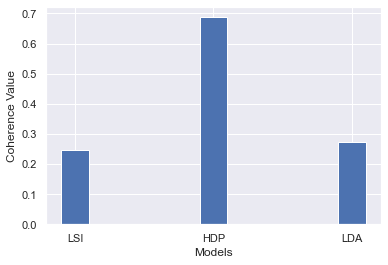

In [480]:
evaluate_bar_graph([coherence_lsi, coherence_hdp, coherence_lda],
                   ['LSI', 'HDP', 'LDA'])

In [481]:
for i in hdpmodel_topics:
    print(i)

['rt', 'biden', 'trump', 'joe', 'say', 'debate', 'president', 'donald', 'lie', 'vote', 'tonight', 'know', 'oil_industry', 'good', 'win', 'hunter', 'time', 'win_debate', 'go_end', 'year']
['rt', 'biden', 'trump', 'joe', 'say', 'president', 'debate', 'tonight', 'lie', 'donald', 'vote', 'time', 'good', 'think', 'know', 'like', 'people', 'hunter', 'oil_industry', 'plan']
['rt', 'biden', 'trump', 'joe', 'say', 'debate', 'president', 'donald', 'lie', 'de', 'vote', 'hunter', 'win', 'industry', 'tonight', 'oil_industry', 'good', 'know', 'win_debate', 'time']
['rt', 'biden', 'trump', 'joe', 'say', 'president', 'vote', 'get', 'oil_industry', 'lie', 'win', 'donald', 'debate', 'tonight', 'know', 'y', 'good', 'right', 'year', 'win_debate']
['rt', 'biden', 'trump', 'joe', 'say', 'debate', 'donald', 'president', 'recent', 'lie', 'know', 'vote', 'day_oval', 'obama', 'tonight', 'year', 'good', 'predecessor', 'willing', 'laptop_russia']
['rt', 'biden', 'trump', 'joe', 'say', 'debate', 'birth', 'shithole

# 2 - using the multi topic data for topic modeling

In [487]:
textm

"bread is a staple food prepared from a dough of flour and water, usually by baking. throughout recorded history, it has been a prominent food in large parts of the world. it is one of the oldest human-made foods, having been of significant importance since the dawn of agriculture, and plays an essential role in both religious rituals and secular culture.bread may be leavened by naturally occurring microbes, chemicals, industrially produced yeast, or high-pressure aeration. in many countries, commercial bread often contains additives to improve flavor,texture, color, shelf life, nutrition, and ease of production the integration of a whole cpu onto a single or a few integrated circuits using very-large-scale integration (vlsi) greatly reduced the cost of processing power.integrated circuit processors are produced in large numbers by highly automated metal-oxide-semiconductor (mos)fabrication processes, resulting in a relatively low unit price. single-chip processorsincrease reliability 

In [519]:
doc_m = nlp(textm)

In [520]:
doc_m 

bread is a staple food prepared from a dough of flour and water, usually by baking. throughout recorded history, it has been a prominent food in large parts of the world. it is one of the oldest human-made foods, having been of significant importance since the dawn of agriculture, and plays an essential role in both religious rituals and secular culture.bread may be leavened by naturally occurring microbes, chemicals, industrially produced yeast, or high-pressure aeration. in many countries, commercial bread often contains additives to improve flavor,texture, color, shelf life, nutrition, and ease of production the integration of a whole cpu onto a single or a few integrated circuits using very-large-scale integration (vlsi) greatly reduced the cost of processing power.integrated circuit processors are produced in large numbers by highly automated metal-oxide-semiconductor (mos)fabrication processes, resulting in a relatively low unit price. single-chip processorsincrease reliability b

In [528]:
texts_m, article_m = [], []
for w in doc_m:
    #print(w.is_stop)
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and w.text != 'I' and w.text.isalpha():
        # we add the lematized version of the word
        article_m.append(w.lemma_)
        #print(texts_m)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        texts_m.append(article_m)
        article_m = []

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [531]:
texts_m= [article_m]

In [532]:
bigram = gensim.models.Phrases(texts_m)
texts_m = [bigram[line] for line in texts_m]

In [533]:
texts_m

[['bread',
  'staple',
  'food',
  'prepare',
  'dough',
  'flour',
  'water',
  'usually',
  'bake',
  'record',
  'history',
  'prominent',
  'food',
  'large',
  'part',
  'world',
  'old',
  'human',
  'food',
  'having',
  'significant',
  'importance',
  'dawn',
  'agriculture',
  'play',
  'essential',
  'role',
  'religious',
  'ritual',
  'secular',
  'leaven',
  'naturally',
  'occur',
  'microbe',
  'chemical',
  'industrially',
  'produce',
  'yeast',
  'high',
  'pressure',
  'aeration',
  'country',
  'commercial',
  'bread',
  'contain',
  'additive',
  'improve',
  'flavor',
  'texture',
  'color',
  'shelf',
  'life',
  'nutrition',
  'ease',
  'production',
  'integration',
  'cpu',
  'single',
  'integrated',
  'circuit',
  'large',
  'scale',
  'integration',
  'vlsi',
  'greatly',
  'reduce',
  'cost',
  'processing',
  'circuit',
  'processor',
  'produce',
  'large',
  'number',
  'highly',
  'automate',
  'metal',
  'oxide',
  'semiconductor',
  'process',
  're

In [534]:
dictionary_m = Dictionary(texts_m)
corpus_m = [dictionary_m.doc2bow(text) for text in texts_m]

In [540]:
#num_topics=10 HDA do not take num topics as it figues itself

In [541]:
hdpmodel_m = HdpModel(corpus=corpus_m, id2word=dictionary_m)

hdpmodel_topics_m=[[word for word, prob in topic] for topicid, topic in hdpmodel_m.show_topics(formatted=False)]

In [542]:
len(hdpmodel_topics_m)

20

In [544]:
lsimodel_m = LsiModel(corpus=corpus_m,num_topics=10, id2word=dictionary_m)

lsimodel_topics_m=[[word for word, prob in topic] for topicid, topic in lsimodel_m.show_topics(formatted=False)]

In [545]:
lsimodel_topics_m

[['food',
  'supporter',
  'true',
  'large',
  'produce',
  'enforcement',
  'integration',
  'single',
  'movement',
  'support']]

In [565]:
ldamodel_m = LdaModel(corpus=corpus_m, id2word=dictionary_m)
ldamodel_topics_m=[[word for word, prob in topic] for topicid, topic in ldamodel_m.show_topics(formatted=False)]

In [566]:
len(ldamodel_topics_m)

10

In [567]:
ldamodel_topics_m

[['prominent',
  'reduce',
  'processor',
  'processorsincrease',
  'produce',
  'production',
  'process',
  'record',
  'result',
  'reliability'],
 ['large',
  'food',
  'true',
  'supporter',
  'single',
  'great',
  'violence',
  'law',
  'cost',
  'semiconductor'],
 ['prominent',
  'reduce',
  'processor',
  'processorsincrease',
  'produce',
  'production',
  'process',
  'record',
  'result',
  'reliability'],
 ['food',
  'supporter',
  'true',
  'large',
  'circuit',
  'country',
  'integration',
  'enforcement',
  'chip',
  'bread'],
 ['prominent',
  'reduce',
  'processor',
  'processorsincrease',
  'produce',
  'production',
  'process',
  'record',
  'result',
  'reliability'],
 ['prominent',
  'reduce',
  'processor',
  'processorsincrease',
  'produce',
  'production',
  'process',
  'record',
  'result',
  'reliability'],
 ['prominent',
  'reduce',
  'processor',
  'processorsincrease',
  'produce',
  'production',
  'process',
  'record',
  'result',
  'reliability'],


In [558]:
cm = CoherenceModel(model=lsimodel_m, texts=texts_m, coherence='c_v')
coherence_lsi_m = cm.get_coherence()

In [560]:
coherence_lsi_m

0.5583253972504165

In [552]:
cm = CoherenceModel(model=ldamodel_m, texts=texts_m, coherence='c_v')
coherence_lda_m = cm.get_coherence()

In [553]:
coherence_lda_m

0.5542750596326551

In [555]:
cm = CoherenceModel(model=hdpmodel_m, texts=texts_m, coherence='c_v')
coherence_hdp_m = cm.get_coherence()

In [556]:
coherence_hdp_m

0.5172065646869727

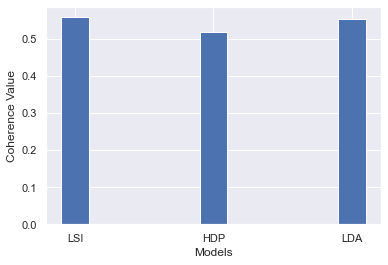

In [561]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

evaluate_bar_graph([coherence_lsi_m, coherence_hdp_m, coherence_lda_m],
                   ['LSI', 'HDP', 'LDA'])

In [562]:
coherence_lda_m

0.5542750596326551